In this lecture we'll talk about modules (not the ones you write by yourself for now) and discuss some common use examples.

General remarks:

**never do `from numpy import *`**

**never do `%pylab`**

This can only be done when you really need to save screen space and typing time (so this can be done in your other lectures, but never in real life). This is like `using namespace std` in `c++`, if not worse.

The word "import" allows the use of functions from some package/module in your code. There are very very many packages in python, most you can install with conda/pip.


Let's start with importing some fun:

In [1]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


### **Standard Library**

[the whole library docs](https://docs.python.org/3/library/)

[math module docs](https://docs.python.org/3/library/math.html)

[itertools docs](https://docs.python.org/3/library/itertools.html?highlight=itertools#module-itertools)

Standard library is something that you don't have to specificaly install.

In [2]:
import math

In [3]:
math.sin(math.pi/2)

1.0

In [4]:
math.sqrt(2)

1.4142135623730951

In [5]:
import itertools as it

In [6]:
permut = it.permutations([1,2,3])
comb = it.combinations([1,2,3,4,5],3) 
pr = it.product([1,2,3],[2,3,4])

In [7]:
print(*permut)

(1, 2, 3) (1, 3, 2) (2, 1, 3) (2, 3, 1) (3, 1, 2) (3, 2, 1)


In [8]:
type(permut)

itertools.permutations

In [9]:
print(*comb)

(1, 2, 3) (1, 2, 4) (1, 2, 5) (1, 3, 4) (1, 3, 5) (1, 4, 5) (2, 3, 4) (2, 3, 5) (2, 4, 5) (3, 4, 5)


In [10]:
print(*pr)

(1, 2) (1, 3) (1, 4) (2, 2) (2, 3) (2, 4) (3, 2) (3, 3) (3, 4)


## **SymPy**

Let's look at something that is actually nice in python, even if it's a bit unrelated to the other material - symbolic calculation package. You can use it if you don't want to learn mathematica or don't have the license for that. 

do `conda install sympy` in your conda environment before proceeding.

In [12]:
import sympy as sp

https://docs.sympy.org/latest/tutorials/intro-tutorial/index.html

It's great even without the symbols:

In [13]:
import math
print(math.sqrt(8))
print(sp.sqrt(8))
sp.sqrt(8)

2.8284271247461903
2*sqrt(2)


2*sqrt(2)

for jupyter nice output, you can dosp.init_printing(use_unicode=True)

In [14]:
sp.init_printing(use_unicode=True)

In [17]:
sp.sqrt(18*4)

Now let's look at symbols:

In [18]:
x, y = sp.symbols('x y')

In [19]:
z=x**2+y**2
print(x*z)
(x*z).expand()

x*(x**2 + y**2)


symbols and variable names, technically, don't have to be the same, but it can be way too confusing

In [21]:
dontdothis = sp.symbols('hi')
print(dontdothis**2)

hi**2


Integrals:

In [22]:
sp.Integral(1/x,x)

In [23]:
sp.integrate(sp.sin(x**2), (x, -sp.oo, sp.oo)) # double o is infinity

In [24]:
sp.oo

In [25]:
sp.expand(x*z)

In [26]:
sp.factor(x**2+2*x+1)

In [27]:
sp.factor(x**3+3*x*x+3*x+1)

In [28]:
sp.collect(x*y + x - 3 + 2*x**2 - z*x**2 + x**3,x)

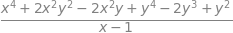

In [29]:
sp.cancel((x*y**2 - 2*x*y*z + x*z**2 + y**2 - 2*y*z + z**2)/(x**2 - 1))

Taylor expansion:

In [30]:
h = sp.symbols('h')
sp.sin(x).series(x, x0=h, n=5)

In [30]:
h = sp.symbols('h')
sp.sin(x).series(x, x0=h, n=5)

In [31]:
sp.sin(x).series(x, x0=0, n=5)

Simplification of expressions:

In [32]:
expr=sp.simplify(x*sp.sin(x)*(1/x+2))
expr

In [33]:
sp.simplify(sp.sin(x)**2 + sp.cos(x)**2)

In [34]:
sp.simplify(sp.sin(x)**4 - 2*sp.cos(x)**2*sp.sin(x)**2 + sp.cos(x)**4)

Derivatives:

In [35]:
sp.diff(expr, x)

Solving equations:

In [36]:
sp.solve(x**2 - 2, x)

Solving differential equations:

In [37]:
y = sp.Function('y')
t=sp.symbols('t')
sp.dsolve(sp.Eq(y(t).diff(t, t) - y(t), sp.exp(t)), y(t))

Evaluating the expressions:
be very careful with trying to change values of what you set as symbols. Python won't complain, but the result might be surprising

In [41]:
x = sp.symbols('x')
expr = x + 1
print(expr)
#x = 1 #uncomment this to get nonsence int he next line
print(x)
print(expr)

x + 1
x
x + 1


In [42]:
expr.subs(x,7)

In [43]:
x,y,z= sp.symbols('x y z')
expr = x**3 + 4*x*y - z
expr.subs([(x, 2), (y, 4), (z, 0)])

You can also create expressions from strings:

In [45]:
str_expr = "x**3 + 7*x - 3/22"
expr = sp.sympify(str_expr)
expr

### **Numpy**

`conda install numpy`

From the docs:

NumPy is the fundamental package for scientific computing in Python. It is a Python library that provides a multidimensional array object, various derived objects (such as masked arrays and matrices), and an assortment of routines for fast operations on arrays, including mathematical, logical, shape manipulation, sorting, selecting, I/O, discrete Fourier transforms, basic linear algebra, basic statistical operations, random simulation and much more.

[documentation](https://numpy.org/doc/stable/user/whatisnumpy.html)


Numpy is mostly used for: 

    - manipulating arrays
    - dealing with linear and matrix algebra
    - basic data processing


It's usually imported as "np". 

In [46]:
import numpy as np

Let's start with the different ways of arrays creations:

In [50]:
arr1 = np.array([1,2,3,4,5],dtype=np.int64)                  # From a list (works with list comprehensions too)
print(arr1)             
print(type(arr1))
print(type(arr1[0]))

[1 2 3 4 5]
<class 'numpy.ndarray'>
<class 'numpy.int64'>


In [51]:
arr2 = np.array([[1,2],[3,4]])
print(arr2)

[[1 2]
 [3 4]]


You can create an array with zeros, ones, or leave it uninitialized

In [9]:
arr3 = np.zeros((3,4), dtype='int')            
arr4 = np.ones((3,4), dtype='float')
arr5=np.empty(10)
print(arr3)
print(arr4)
print(arr5)

[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]
[0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 2.48819961e+180 1.38053330e-047 6.19656092e-091
 5.19416176e+170 8.07184967e-315]


In [54]:
arr6 = np.full((3,5), 7.77)       # fill in the array with 1 number
arr7 = np.arange(1,100,17)        # just like "range"
arr8 = np.linspace(0,1,27)        # 27 values linearly spaced from 0 to 1
arr9 = np.eye(3)      #identity
print(arr6)
print(arr7)
print(arr8)
print(arr9)

[[7.77 7.77 7.77 7.77 7.77]
 [7.77 7.77 7.77 7.77 7.77]
 [7.77 7.77 7.77 7.77 7.77]]
[ 1 18 35 52 69 86]
[0.         0.03846154 0.07692308 0.11538462 0.15384615 0.19230769
 0.23076923 0.26923077 0.30769231 0.34615385 0.38461538 0.42307692
 0.46153846 0.5        0.53846154 0.57692308 0.61538462 0.65384615
 0.69230769 0.73076923 0.76923077 0.80769231 0.84615385 0.88461538
 0.92307692 0.96153846 1.        ]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


If you work specifically in 2D, you can use "matrix":

In [52]:
a = np.matrix('1 2; 3 4')
print(a)

[[1 2]
 [3 4]]


In [16]:
print(type(a))

<class 'numpy.matrix'>


In [55]:
arr10=np.ones_like(arr6)
print(arr10)

[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]


You can also create random arrays:

In [56]:
arr11 = np.random.random((3,5))    # 3x5 Random numbers matrix with entries between 0-1
arr12 = np.random.normal(0,5,(3,4))  # 3x4 Random numbers normal distributed with mean 0 and standard dev 5
print(arr11)
print(arr12)

[[0.91691562 0.78584018 0.77450262 0.01793789 0.2540689 ]
 [0.95355357 0.15630012 0.01047056 0.6957755  0.01809941]
 [0.41674196 0.4961402  0.22281323 0.63537494 0.42621195]]
[[ 7.25217699  2.77421669  1.77298924  5.96975112]
 [ 0.29287641 -1.79228916 -0.41035523 -2.82226094]
 [-3.29528017 -0.94426917  1.13872996  0.03429698]]


#### **Element-wise calculations:**

In [63]:
#standard math operations:
A = np.linspace(1,10,10)
B = np.linspace(1,10,11) #it will complain if sizes do not match
print(A+B)
print(A-B)
print(A*B)
print(A/B)
print(A//B)
print(A**B)
print(A%B)


ValueError: operands could not be broadcast together with shapes (10,) (11,) 

In [64]:
arr=np.linspace(0.1,1,10)
print(abs(arr))
print(np.cos(arr))
print(np.arccos(arr))
print(np.exp(arr))
print(np.log(abs(arr)))
print(np.reciprocal(arr))

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
[0.99500417 0.98006658 0.95533649 0.92106099 0.87758256 0.82533561
 0.76484219 0.69670671 0.62160997 0.54030231]
[1.47062891 1.36943841 1.26610367 1.15927948 1.04719755 0.92729522
 0.79539883 0.64350111 0.45102681 0.        ]
[1.10517092 1.22140276 1.34985881 1.4918247  1.64872127 1.8221188
 2.01375271 2.22554093 2.45960311 2.71828183]
[-2.30258509 -1.60943791 -1.2039728  -0.91629073 -0.69314718 -0.51082562
 -0.35667494 -0.22314355 -0.10536052  0.        ]
[10.          5.          3.33333333  2.5         2.          1.66666667
  1.42857143  1.25        1.11111111  1.        ]


#### **Joining, splitting, shaping**

In [65]:
#for joining arrays you can use concatinate
arr1 = np.array([1,2,3,4])
arr2 = np.array([5,6,7,8])
print(np.concatenate([arr1,arr2]))


[1 2 3 4 5 6 7 8]


In [66]:
#you can reshape the arrays, it will complain if dimensions do not allow for that
A = arr1.reshape(2,2)
B = arr2.reshape(2,2)
print(np.concatenate([A,B]))
print(np.concatenate([A,B],axis=1))

[[1 2]
 [3 4]
 [5 6]
 [7 8]]
[[1 2 5 6]
 [3 4 7 8]]


In [67]:
#you can "stack" arrays horizontally or vertically
vect1 = np.array([1,2,3])
vect2 = np.array([[4,5,6],[7,8,9]])
print(vect1,np.shape(vect1))
print(vect2,np.shape(vect2))
print(np.vstack([vect1,vect2]))
print(np.hstack([vect1.reshape(3,1),vect2.T]))

[1 2 3] (3,)
[[4 5 6]
 [7 8 9]] (2, 3)
[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[1 4 7]
 [2 5 8]
 [3 6 9]]


In [27]:
#splitting the arrays
A = np.arange(20).reshape(4,5)
print(A)
B,C = np.split(A,2)
print("B=",B)
print("C=",C)
B,C = np.split(A,[3],axis=1) #split vertically
print(B)
print(C)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]
B= [[0 1 2 3 4]
 [5 6 7 8 9]]
C= [[10 11 12 13 14]
 [15 16 17 18 19]]
[[ 0  1  2]
 [ 5  6  7]
 [10 11 12]
 [15 16 17]]
[[ 3  4]
 [ 8  9]
 [13 14]
 [18 19]]


#### **Element access**

In [68]:
A = np.array([range(i,i+5) for i in [1,6,11,16,21]])
print(A,'\n')
print(A[1,1],A[1,3],A[-1,-1],A[-1,2])  # Accessing individual elements, negative counts from the end
A[2,3] = 777    # Changing elements
print(A,'\n')             
A[2,2] = 1.234   # Attention! numpy won't change array type, it will change your input
print(A,'\n')

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]
 [21 22 23 24 25]] 

7 9 25 23
[[  1   2   3   4   5]
 [  6   7   8   9  10]
 [ 11  12  13 777  15]
 [ 16  17  18  19  20]
 [ 21  22  23  24  25]] 

[[  1   2   3   4   5]
 [  6   7   8   9  10]
 [ 11  12   1 777  15]
 [ 16  17  18  19  20]
 [ 21  22  23  24  25]] 



You can specify the type you need to save that situation:

In [69]:
A = np.array([range(i,i+5) for i in [1,6,11,16,21]],dtype='float')
            
A[2,2] = 1.234   # Attention! numpy won't change array type, it will change your input
print(A,'\n')

[[ 1.     2.     3.     4.     5.   ]
 [ 6.     7.     8.     9.    10.   ]
 [11.    12.     1.234 14.    15.   ]
 [16.    17.    18.    19.    20.   ]
 [21.    22.    23.    24.    25.   ]] 



You can have the same syntax as with range before (this takes time to get used to...):

In [72]:
print(A[1:4,1:4], '\n')  # central sub array
print(A[:3,2:],'\n')    # top right sub array
print(A[:,0:5:2],'\n')  # only even columns
print(A[::-1,:],'\n')   # reverse the rows 

[[ 7.     8.     9.   ]
 [12.     1.234 14.   ]
 [17.    18.    19.   ]] 

[[ 3.     4.     5.   ]
 [ 8.     9.    10.   ]
 [ 1.234 14.    15.   ]] 

[[ 1.     3.     5.   ]
 [ 6.     8.    10.   ]
 [11.     1.234 15.   ]
 [16.    18.    20.   ]
 [21.    23.    25.   ]] 

[[21.    22.    23.    24.    25.   ]
 [16.    17.    18.    19.    20.   ]
 [11.    12.     1.234 14.    15.   ]
 [ 6.     7.     8.     9.    10.   ]
 [ 1.     2.     3.     4.     5.   ]] 



**Surprise!** If you assign this to something, this acts like a "reference" instead of copy

In [73]:
B=A[1:4,1:4]
B[2][2]=999
print(B)
print(A)

[[  7.      8.      9.   ]
 [ 12.      1.234  14.   ]
 [ 17.     18.    999.   ]]
[[  1.      2.      3.      4.      5.   ]
 [  6.      7.      8.      9.     10.   ]
 [ 11.     12.      1.234  14.     15.   ]
 [ 16.     17.     18.    999.     20.   ]
 [ 21.     22.     23.     24.     25.   ]]


you need to call the `copy()` to actually copy:

In [25]:
B=A[1:4,1:4].copy()
B[2][2]=888
print(B)
print(A)

[[  7   8   9]
 [ 12   1 777]
 [ 17  18 888]]
[[  1   2   3   4   5]
 [  6   7   8   9  10]
 [ 11  12   1 777  15]
 [ 16  17  18 999  20]
 [ 21  22  23  24  25]]


#### **Linear Algebra** 

In [74]:
A = np.array([[1,77,3],[4,5,6],[7,8,9]])
B = np.linspace(5,30,6).reshape(3,2)
print('A:',A)
print('B:',B)
print('dot product\n',np.dot(A,B))
print('Matrix product\n',np.matmul(A,B)) #different from dot for dimensions>2
print('Inner product\n',np.inner(A,A))
print('Outer product\n',np.outer(A,B))
print('Trace\n',np.trace(A))
print('Transpose\n',A.T)
print('Matrix Power\n',np.linalg.matrix_power(A,2))
print('Inverse\n',np.linalg.inv(A))
print('Singular Value Decomposition\n',np.linalg.svd(A))
print('Determinant\n',np.linalg.det(A))
print('Eigen decomposition\n',np.linalg.eig(A))

A: [[ 1 77  3]
 [ 4  5  6]
 [ 7  8  9]]
B: [[ 5. 10.]
 [15. 20.]
 [25. 30.]]
dot product
 [[1235. 1640.]
 [ 245.  320.]
 [ 380.  500.]]
Matrix product
 [[1235. 1640.]
 [ 245.  320.]
 [ 380.  500.]]
Inner product
 [[5939  407  650]
 [ 407   77  122]
 [ 650  122  194]]
Outer product
 [[   5.   10.   15.   20.   25.   30.]
 [ 385.  770. 1155. 1540. 1925. 2310.]
 [  15.   30.   45.   60.   75.   90.]
 [  20.   40.   60.   80.  100.  120.]
 [  25.   50.   75.  100.  125.  150.]
 [  30.   60.   90.  120.  150.  180.]
 [  35.   70.  105.  140.  175.  210.]
 [  40.   80.  120.  160.  200.  240.]
 [  45.   90.  135.  180.  225.  270.]]
Trace
 15
Transpose
 [[ 1  4  7]
 [77  5  8]
 [ 3  6  9]]
Matrix Power
 [[330 486 492]
 [ 66 381  96]
 [102 651 150]]
Inverse
 [[-0.00666667 -1.48666667  0.99333333]
 [ 0.01333333 -0.02666667  0.01333333]
 [-0.00666667  1.18       -0.67333333]]
Singular Value Decomposition
 SVDResult(U=array([[-9.91282776e-01,  1.31750591e-01, -4.90747261e-04],
       [-6.9932839

In [ ]:
help(np.inner)

### **Statistics:**

In [75]:
A = np.linspace(0,1,9)
print('A:',A)
print('sum:               ',np.sum(A))
print('product:           ',np.prod(A))
print('mean:              ',np.mean(A))
print('standard deviation:',np.std(A))
print('variance:          ',np.var(A))
print('minimum:           ',np.min(A))
print('maximum:           ',np.max(A))
print('median:            ',np.median(A))
print('index of min:      ',np.argmin(A))
print('index of max:      ',np.argmax(A))

A: [0.    0.125 0.25  0.375 0.5   0.625 0.75  0.875 1.   ]
sum:                4.5
product:            0.0
mean:               0.5
standard deviation: 0.3227486121839514
variance:           0.10416666666666667
minimum:            0.0
maximum:            1.0
median:             0.5
index of min:       0
index of max:       8


**"Surprise" on argmin/argmax:**

In [77]:
A=np.linspace(0,10,9).reshape(3,3)
print(A)
print(np.argmax(A))

[[ 0.    1.25  2.5 ]
 [ 3.75  5.    6.25]
 [ 7.5   8.75 10.  ]]
8


In [78]:
print(np.unravel_index(np.argmax(A), A.shape))

(2, 2)


#### **More traps:**

Sometimes you have to think like a c/c++ programmer:

**overflow is possible with numpy arrays**

In [79]:
arr13 = 12345678987654321*np.ones((1), dtype='int8')
arr14 = np.array([12345678987654321], dtype='int8')
print(arr13)
print(arr14)

[12345678987654321]
[-79]


/tmp/ipykernel_22528/817877739.py:2: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of 12345678987654321 to int8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  arr14 = np.array([12345678987654321], dtype='int8')


If you deal with too much data/big arrays, it's a good idea to "delete" them after usage, so that they wouldn't take up memory space. Python garbage collector will take care of them then (though not instantly). You can just do:

In [37]:
arr1=None
print(arr1)

None


Why use numpy arrays over "normal lists"?

In [80]:
A=np.array(range(0,900)).reshape(30,30)
B=np.array(range(34,934)).reshape(30,30)

In [29]:
%%timeit
np.matmul(A,B)

29.2 µs ± 527 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [30]:
A=[[x for x in range(30)] for i in range(30)]
B=[[x+34 for x in range(30)] for i in range(30)]

In [31]:
%%timeit
np.matmul(A,B)

212 µs ± 19 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


#### **Is numpy fast?**

Yes, when you know what you are doing.

Unfortunately, it's very easy to write bad code in python, much easier than in c/c++...
